# Project 3 - Part 1, Git Practice, APS1070 Winter 2024

**Deadline: March 5th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

In this project we work on a [stores sales dataset](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data) that reports the total daily sales for different product families sold at all the Favorita stores located in Ecuador from Oct 2016 to Aug 2017.

Please fill out the following:


*   Your **name**: Parsa Youssefpour
*   Your **student number**: 1004749659



## Part 1: Getting started with GitHub [1.5 Marks + 1.5 Mark Git Submission]

1. Write a function to do the following: **[0.5]**
    * Takes the dataframe, and your product family list as inputs (Books, Cleaning, Beverages, ...)
    * Plots time-series for the input list (it is best to plot each family in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on both the original as well as the standardized dataset for the `POULTRY`, `GROCERY I`, `SCHOOL AND OFFICE SUPPLIES`, `CELEBRATION`, `LAWN AND GARDEN`, and `FROZEN FOODS`.   **[0.25]**
4. Discuss the trends in the standardized time-series for `POULTRY`, `GROCERY I`, `SCHOOL AND OFFICE SUPPLIES`, `CELEBRATION`, `LAWN AND GARDEN`, and `FROZEN FOODS`. What does it mean if the curve goes up or down? What does the sign of values indicate? **[0.5]**

In [1]:
import pandas as pd
data_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/TotalSalesbyFamily.csv',
    index_col=0
)

Raw Data


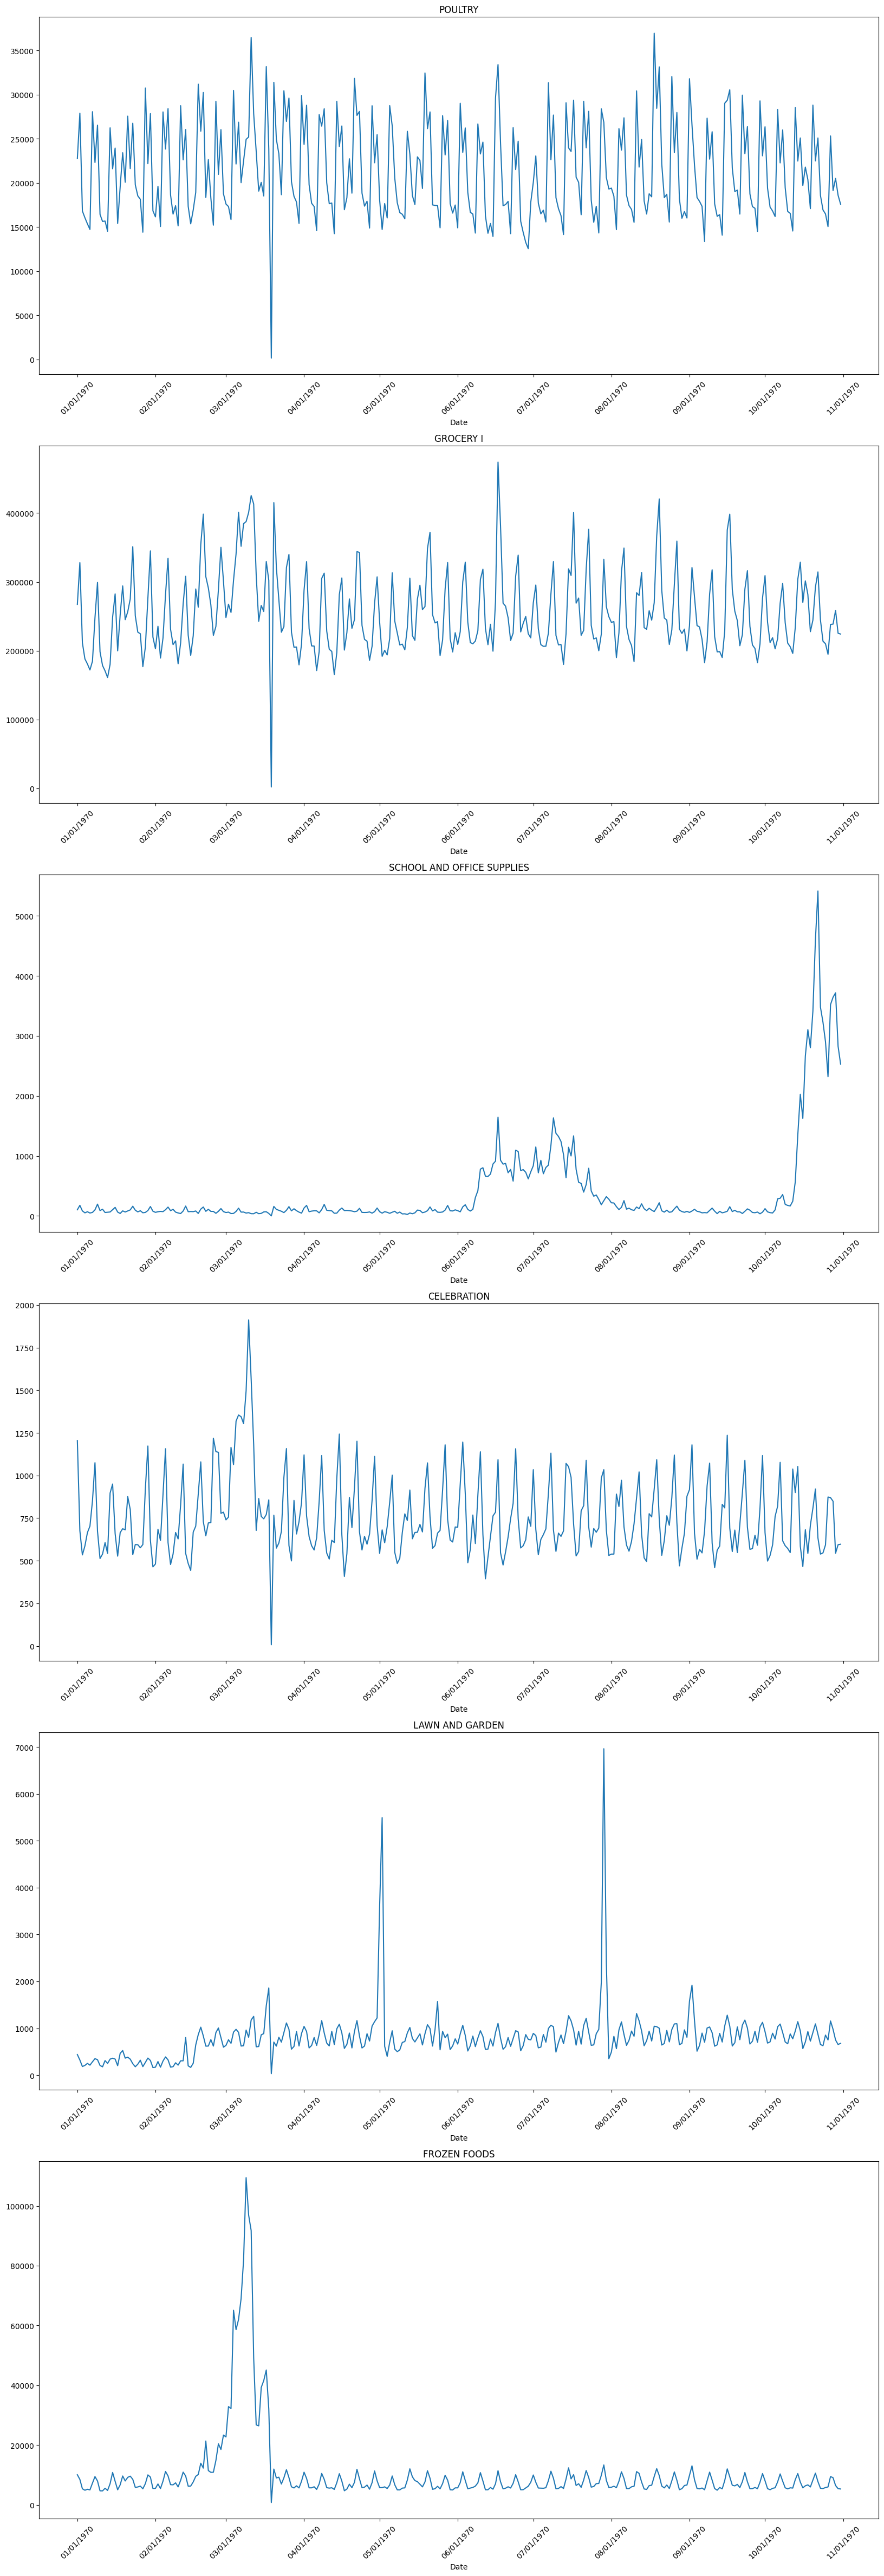

Standardized Data


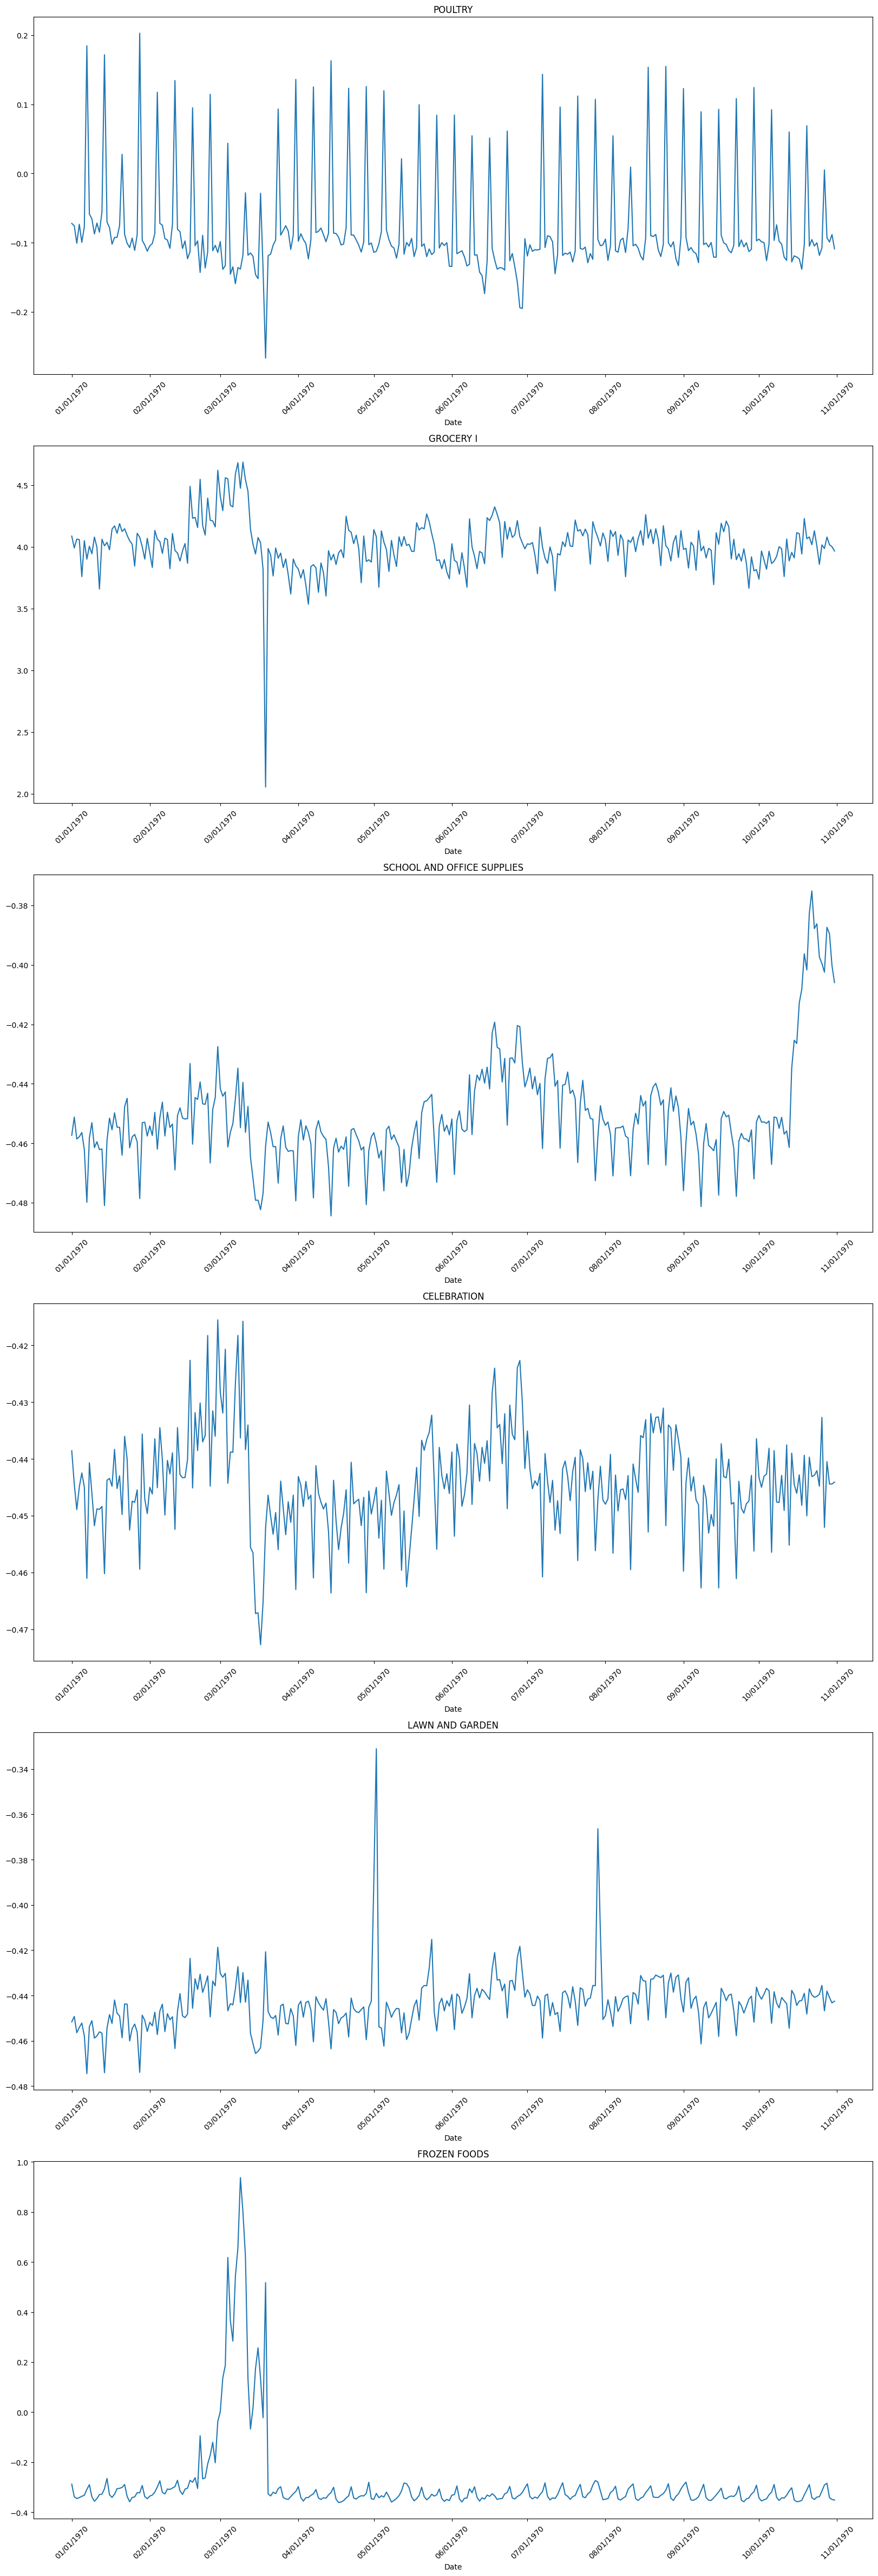

In [2]:
### YOUR CODE HERE ###
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_raw)
std_df = pd.DataFrame(standardized_data, columns=data_raw.columns)
std_df.index = data_raw.index


def time_series_plot(df,product_family):
    n = len(product_family)
    fig, axs = plt.subplots(n,1, figsize=(20, n*10))
    x = list(df.columns)
    axs = axs.flatten()
    for i in range(len(product_family)):
        y=list(df.loc[product_family[i]])
        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
        axs[i].xaxis.set_major_locator(mdates.AutoDateLocator())
        axs[i].plot(x,y)
        
        axs[i].set_title(f'{product_family[i]}')
        axs[i].set_xlabel("Date")
        for label in axs[i].get_xticklabels():
            label.set_rotation(45)
    
    plt.show()
    

product_family_lst = ["POULTRY", "GROCERY I", "SCHOOL AND OFFICE SUPPLIES", "CELEBRATION", "LAWN AND GARDEN", "FROZEN FOODS"]

print("Raw Data")
time_series_plot(data_raw,product_family_lst)

print("Standardized Data")
time_series_plot(std_df,product_family_lst)




The graphs show the sales trends of each item over time. 

Overall, the standardized data in this dataset represents the sales of each category with each other per day. 


POULTRY:

Poultry displays a relatively cyclical trend with a mean around zero, indicating that a product's sales are average compared to the other products. The cyclical pattern could represent the stores restocking the items.


GROCERY I:

Grocery I seems to have a high number of sales compared to other products, as it has an above 0 std value for the entire timeline. However, a significant drop can be seen in the graph, and this drop can be seen in other categories as well. This could potentially mean that the store was closed that day and didn't make any sales on that specific day.


SCHOOL AND OFFICE SUPPLIES:

The School and office supplies also experience a cyclical pattern, but it can be seen that the sale significantly increases in September, which is when the school year begins.


CELEBRATION:

Overall, the celebration curve shows that the sale of celebration items is below average compared to other items per day. It can also be noticed that the sale of the celebration items increases around December (for Christmas and new years).


LAWN AND GARDEN:

The values on the y-axis of the lawn and garden graph indicate that the sale of these items is less than average per day compared to the other items the store sells. Two peaks can also be seen in the graph, one being on Valentine's Day for some reason.


FROZEN FOODS:

The sale of frozen food is usually below average compared to other items. However, there was a significant increase in December, but it dropped back in January.



----
What does it mean if the curve goes up or down? 

Curve going up and down describes sales going up and down respectively. This could be an indication that would allow us to identify how promoting a product affects sales.


What does the sign of values indicate?

A negative value indicates a sale that is less than average compared to the rest of the available categories on that day. While a positive standardized value means that the item had a more than average sale compared to the other items on that day,


